In [6]:
!{sys.executable} -m pip install textblob


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)


In [7]:
!{sys.executable} -m textblob.download_corpora


[nltk_data] Downloading package brown to /home/betsinat/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/betsinat/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/betsinat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/betsinat/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /home/betsinat/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/betsinat/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [16]:
import sys, os

project_root = os.path.abspath("..")  # go up one level from notebooks/
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root:", project_root)
print("src is available:", os.path.isdir(os.path.join(project_root, "src")))


Project root: /home/betsinat/news-eda
src is available: True


In [19]:
import pandas as pd
from src.nlp_utils import clean_text

# Load your raw data
df = pd.read_csv("data/raw_analyst_ratings.csv")

print("Original columns:", df.columns.tolist())

# Step 1: Clean headline text
df["clean_headline"] = df["headline"].astype(str).apply(clean_text)

# Step 2: Normalize date column
df["date"] = pd.to_datetime(df["date"], errors="coerce").dt.date

# Step 3: Keep only necessary columns
df_clean = df[["date", "headline", "clean_headline", "publisher", "stock"]].copy()

# Step 4: Drop rows with missing dates or headlines
df_clean = df_clean.dropna(subset=["date", "clean_headline"])

# Step 5: Save cleaned dataset
df_clean.to_csv("data/clean_news.csv", index=False)

print("Saved cleaned dataset → data/clean_news.csv")
print(df_clean.head())


Original columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']


Saved cleaned dataset → data/clean_news.csv
         date                                           headline  \
0  2020-06-05            Stocks That Hit 52-Week Highs On Friday   
1  2020-06-03         Stocks That Hit 52-Week Highs On Wednesday   
2  2020-05-26                      71 Biggest Movers From Friday   
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session   
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...   

                                      clean_headline          publisher stock  
0               stocks that hit week highs on friday  Benzinga Insights     A  
1            stocks that hit week highs on wednesday  Benzinga Insights     A  
2                         biggest movers from friday         Lisa Levin     A  
3            stocks moving in fridays midday session         Lisa Levin     A  
4  b of a securities maintains neutral on agilent...         Vick Meyer     A  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

plt.style.use("ggplot")


In [9]:
stock_df = pd.read_csv("data/AAPL.csv")

# Convert date column
stock_df["Date"] = pd.to_datetime(stock_df["Date"])

# Sort by date
stock_df = stock_df.sort_values("Date")

# Display preview
stock_df.head()


,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [21]:
news_df = pd.read_csv("data/clean_news.csv")

# Convert date
news_df["date"] = pd.to_datetime(news_df["date"])

# Filter only AAPL news
news_df = news_df[news_df["stock"] == "AAPL"]

news_df.head()


,date,headline,clean_headline,publisher,stock
102,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,tech stocks and faangs strong again to start d...,JJ Kinahan,AAPL
103,2020-06-10,10 Biggest Price Target Changes For Wednesday,biggest price target changes for wednesday,Lisa Levin,AAPL
104,2020-06-10,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",benzinga pros top stocks to watch for wed jun ...,Benzinga Newsdesk,AAPL
105,2020-06-10,"Deutsche Bank Maintains Buy on Apple, Raises P...",deutsche bank maintains buy on apple raises pr...,Benzinga Newsdesk,AAPL
106,2020-06-10,Apple To Let Users Trade In Their Mac Computer...,apple to let users trade in their mac computer...,Neer Varshney,AAPL


In [22]:
news_df["date"] = news_df["date"].dt.date
stock_df["Date"] = stock_df["Date"].dt.date


In [23]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df["sentiment"] = news_df["headline"].apply(get_sentiment)

news_df.head()


,date,headline,clean_headline,publisher,stock,sentiment
102,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,tech stocks and faangs strong again to start d...,JJ Kinahan,AAPL,0.433333
103,2020-06-10,10 Biggest Price Target Changes For Wednesday,biggest price target changes for wednesday,Lisa Levin,AAPL,0.000000
104,2020-06-10,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",benzinga pros top stocks to watch for wed jun ...,Benzinga Newsdesk,AAPL,0.500000
105,2020-06-10,"Deutsche Bank Maintains Buy on Apple, Raises P...",deutsche bank maintains buy on apple raises pr...,Benzinga Newsdesk,AAPL,0.000000
106,2020-06-10,Apple To Let Users Trade In Their Mac Computer...,apple to let users trade in their mac computer...,Neer Varshney,AAPL,0.000000


In [24]:
daily_sentiment = (
    news_df.groupby("date")["sentiment"]
    .mean()
    .reset_index()
    .rename(columns={"sentiment": "daily_sentiment"})
)

daily_sentiment.head()


,date,daily_sentiment
0,2020-06-09,0.088333
1,2020-06-10,0.166919


In [25]:
stock_df["return"] = stock_df["Close"].pct_change()

daily_stock = stock_df[["Date", "Close", "return"]].rename(columns={"Date": "date"})

daily_stock.head()


,date,Close,return
0,2009-01-02,2.721686,NaN
1,2009-01-05,2.836553,0.042204
2,2009-01-06,2.789767,-0.016494
3,2009-01-07,2.729484,-0.021609
4,2009-01-08,2.780169,0.018570


In [26]:
merged = pd.merge(daily_sentiment, daily_stock, on="date", how="inner")

merged.head()


,date,daily_sentiment,Close,return
0,2020-06-09,0.088333,83.419868,0.031578
1,2020-06-10,0.166919,85.566071,0.025728


In [27]:
corr = merged["daily_sentiment"].corr(merged["return"])
corr


np.float64(-1.0)

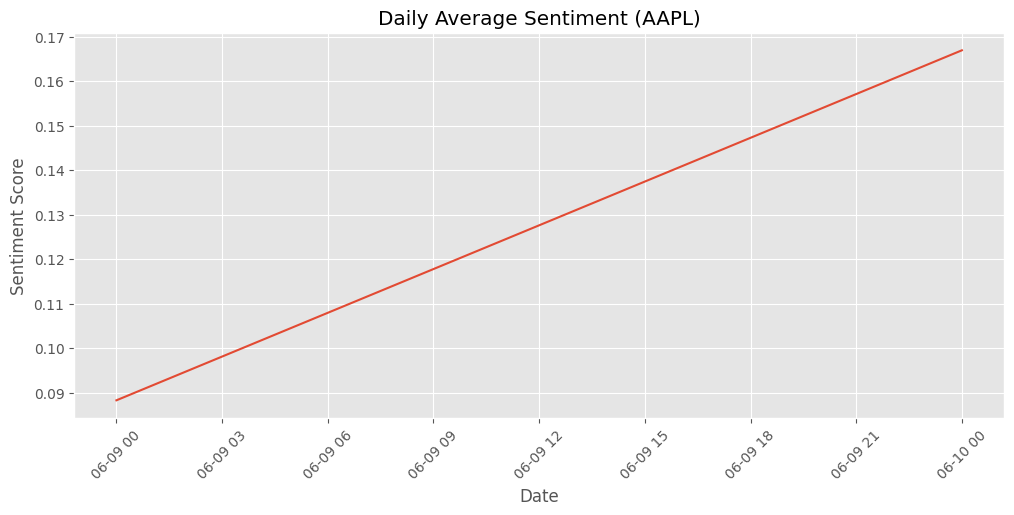

In [28]:
plt.figure(figsize=(12,5))
plt.plot(merged["date"], merged["daily_sentiment"])
plt.title("Daily Average Sentiment (AAPL)")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.show()


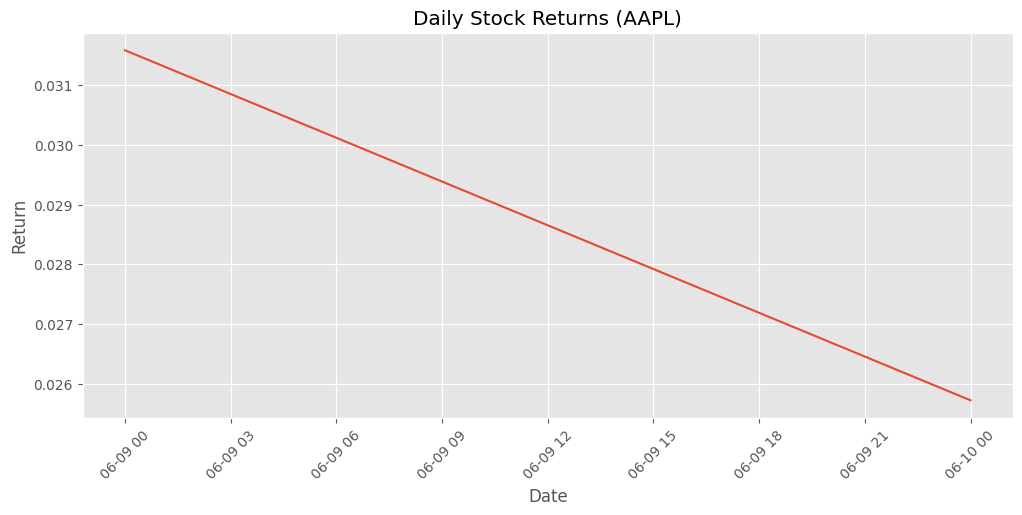

In [29]:
plt.figure(figsize=(12,5))
plt.plot(merged["date"], merged["return"])
plt.title("Daily Stock Returns (AAPL)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.xticks(rotation=45)
plt.show()


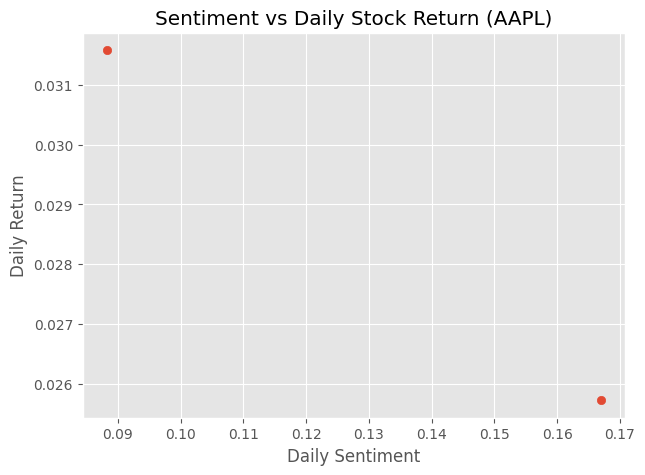

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(merged["daily_sentiment"], merged["return"])
plt.title("Sentiment vs Daily Stock Return (AAPL)")
plt.xlabel("Daily Sentiment")
plt.ylabel("Daily Return")
plt.show()


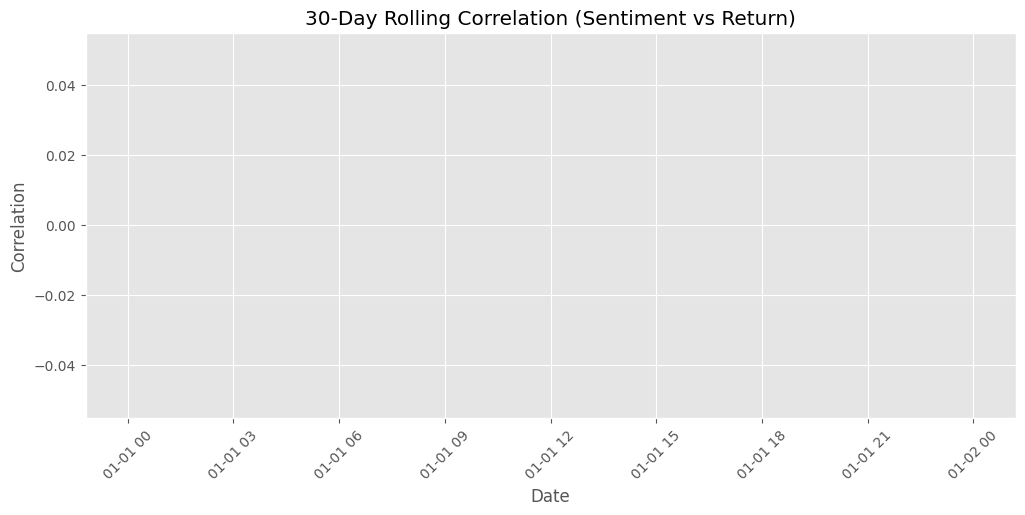

In [31]:
merged["rolling_corr"] = (
    merged["daily_sentiment"]
    .rolling(30)
    .corr(merged["return"])
)

plt.figure(figsize=(12,5))
plt.plot(merged["date"], merged["rolling_corr"])
plt.title("30-Day Rolling Correlation (Sentiment vs Return)")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()
